## Propriedades de um experimento de Poisson
(modelo de chegadas aleatórias em situações que ocorrem filas de espera)
- Prob. de uma ocorrência é a mesma para quaisquer dos intervalos de igual comprimento
- Ocorrência ou não em qualquer intervalo é independente da ocorrência ou não em qualquer outro intevalo
## X ~ Po(m)
### E(X) = Var(X)

In [30]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [26]:
# probabilidade de x ocorrências em um intervalo, com valor_esperado= m  (mean ou média de chegadas em um intervalo)
x= 0             # nr exato de ocorrências no intervalo
m= 6             # média no intervalo = taxa de ocorrência
p= poisson.pmf(x,m)
d= {'p':[p], '1-p':[(1-p)]}
pd.DataFrame(data=d)

,p,1-p
0,0.367879,0.632121


In [29]:
# probabilidade de um conjunto de x ocorrências em um intervalo, 
#                      com valor_esperado= m  (mean ou média de chegadas em um intervalo)
l_x= list(range(0,2+1))    # (t,z+1) > de t a z ocorrências
#m= 3    # outra media
# rodar a célula
p_x= [poisson.pmf(x,m) for x in l_x]
d = {'x':l_x,    
    'P(x)':p_x}
dfp = pd.DataFrame(data=d)
dfp.set_index('x', inplace=True)
df= dfp.transpose()
df['soma']= dfp.sum()
df[('1-p')]= 1-dfp.sum()
df

x,0,1,2,soma,1-p
P(x),0.049787,0.149361,0.224042,0.42319,0.57681


In [31]:
# ajuste da médias para intervalo de comprimento proporcional
m1= 5   # média inicial
t1= 1   # intervalo inicial
t= 8    # novo intervalo
m= t * m1/t1
x= 50   # nr de sucessos
p= poisson.pmf(x,m)
d= {'Novo intervalo':[t],'Nova média':[m],'p':[p], '1-p':[(1-p)]}
pd.DataFrame(data=d)

,Novo intervalo,Nova média,p,1-p
0,8,40.0,0.017707,0.982293


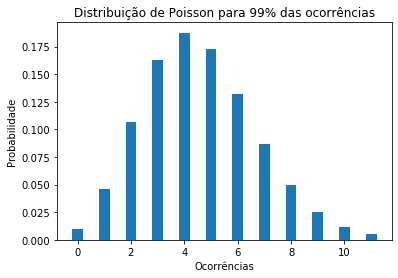

In [16]:
x99=poisson.interval(0.99,m)   # intervalo com 99% da distribuição
l_x= list(range(int(x99[0]),int(x99[1])+1))
p_x= [poisson.pmf(x,m) for x in l_x]
plt.xlabel('Ocorrências')
plt.ylabel('Probabilidade')
plt.title('Distribuição de Poisson para 99% das ocorrências')
plt.bar(l_x,p_x, width=0.4)
plt.show()